In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import bokeh
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns
sns.set(style="white", color_codes=True)

In [2]:


df_pollution = pd.read_csv('pollution_us.csv', encoding="unicode_escape")

In [3]:
sampled_data = df_pollution.sample(n=10000, random_state=42)



In [6]:
sampled_data.to_csv('airqualUSS_123.csv', index=False)



In [7]:
df_air_quality = pd.read_csv('airqualUSS_123.csv', encoding="unicode_escape")




In [8]:
print(df_air_quality.columns)




Index(['Unnamed: 0', 'State Code', 'County Code', 'Site Num', 'Address',
       'State', 'County', 'City', 'Date Local', 'NO2 Units', 'NO2 Mean',
       'NO2 1st Max Value', 'NO2 1st Max Hour', 'NO2 AQI', 'O3 Units',
       'O3 Mean', 'O3 1st Max Value', 'O3 1st Max Hour', 'O3 AQI', 'SO2 Units',
       'SO2 Mean', 'SO2 1st Max Value', 'SO2 1st Max Hour', 'SO2 AQI',
       'CO Units', 'CO Mean', 'CO 1st Max Value', 'CO 1st Max Hour', 'CO AQI'],
      dtype='object')


In [9]:
print(df_air_quality.dtypes)



Unnamed: 0             int64
State Code             int64
County Code            int64
Site Num               int64
Address               object
State                 object
County                object
City                  object
Date Local            object
NO2 Units             object
NO2 Mean             float64
NO2 1st Max Value    float64
NO2 1st Max Hour       int64
NO2 AQI                int64
O3 Units              object
O3 Mean              float64
O3 1st Max Value     float64
O3 1st Max Hour        int64
O3 AQI                 int64
SO2 Units             object
SO2 Mean             float64
SO2 1st Max Value    float64
SO2 1st Max Hour       int64
SO2 AQI              float64
CO Units              object
CO Mean              float64
CO 1st Max Value     float64
CO 1st Max Hour        int64
CO AQI               float64
dtype: object


In [10]:
df_air_quality.head()


,Unnamed: 0,State Code,County Code,Site Num,Address,State,County,City,Date Local,NO2 Units,...,SO2 Units,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Units,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI
0,44403,8,1,3001,3174 E. 78TH AVE.,Colorado,Adams,Welby,2007-07-16,Parts per billion,...,Parts per billion,2.000000,11.0,8,16.0,Parts per million,0.383333,1.1,6,NaN
1,15612,6,23,1004,717 SOUTH AVENUE,California,Humboldt,Eureka,2015-04-21,Parts per billion,...,Parts per billion,-0.079167,0.0,5,0.0,Parts per million,0.412500,0.5,7,NaN
2,12092,6,19,8,"3425 N FIRST ST, FRESNO",California,Fresno,Fresno,2009-07-19,Parts per billion,...,Parts per billion,3.457143,4.3,11,NaN,Parts per million,0.182609,0.3,5,NaN
3,69423,42,17,12,ROCKVIEW LANE,Pennsylvania,Bucks,Bristol,2005-04-27,Parts per billion,...,Parts per billion,2.541667,6.0,23,9.0,Parts per million,0.129167,0.3,18,NaN
4,16905,6,23,1004,717 SOUTH AVENUE,California,Humboldt,Eureka,2012-05-13,Parts per billion,...,Parts per billion,-0.460000,-0.4,11,NaN,Parts per million,0.400000,0.4,0,5.0


In [11]:
#efficient way to extract year from string format date
df_air_quality['year'] = pd.DatetimeIndex(df_air_quality['Date Local']).year
df_air_quality['month'] = pd.DatetimeIndex(df_air_quality['Date Local']).month
df_air_quality['Date Local'] = pd.to_datetime(df_air_quality['Date Local'], format='%Y-%m-%d')

In [12]:


#Drop extraneous columns
df_air_quality = df_air_quality.drop(['Unnamed: 0','State Code','County Code','Address','Site Num','NO2 Units','O3 Units','SO2 Units','CO Units'], axis=1)

In [13]:
df_air_quality.describe()



,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month
count,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,5022.000000,10000.000000,10000.000000,10000.000000,4997.000000,10000.000000,10000.000000
mean,12.808030,25.44980,11.639400,23.930800,0.026179,0.039214,10.161300,36.224100,1.881695,4.519120,9.681400,7.074074,0.373274,0.623507,7.816300,6.120072,2008.303300,6.521100
std,9.482826,15.86294,7.879922,15.096967,0.011492,0.015563,4.006281,20.365293,2.819657,8.122651,6.726828,12.361920,0.311988,0.636169,7.928508,5.843536,4.677296,3.292968
min,-0.766667,-0.40000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.728571,-1.700000,0.000000,0.000000,-0.009091,0.000000,0.000000,0.000000,2000.000000,1.000000
25%,5.791667,13.00000,5.000000,12.000000,0.017792,0.029000,9.000000,25.000000,0.254167,0.900000,4.000000,1.000000,0.187500,0.300000,0.000000,2.000000,2004.000000,4.000000
50%,10.666667,23.80000,9.000000,22.000000,0.025917,0.038000,10.000000,33.000000,1.000000,2.000000,8.000000,3.000000,0.295652,0.400000,6.000000,5.000000,2009.000000,7.000000
75%,17.762733,35.90000,20.000000,33.000000,0.034083,0.049000,11.000000,42.000000,2.300000,5.000000,14.000000,9.000000,0.479167,0.800000,13.000000,8.000000,2012.000000,9.000000
max,92.173913,146.00000,23.000000,110.000000,0.079667,0.126000,23.000000,205.000000,56.083333,209.000000,23.000000,161.000000,4.037500,12.500000,23.000000,62.000000,2016.000000,12.000000


In [14]:
print(df_air_quality.State.unique())



['Colorado' 'California' 'Pennsylvania' 'Illinois' 'Missouri'
 'Connecticut' 'Texas' 'Indiana' 'Michigan' 'North Carolina' 'Arizona'
 'North Dakota' 'Kansas' 'Virginia' 'District Of Columbia' 'New York'
 'Maine' 'Wyoming' 'Ohio' 'Florida' 'New Mexico' 'Arkansas' 'Utah'
 'Massachusetts' 'Maryland' 'Nevada' 'Oklahoma' 'Iowa' 'Georgia'
 'Tennessee' 'Kentucky' 'New Jersey' 'South Carolina' 'Delaware' 'Oregon'
 'Rhode Island' 'Louisiana' 'Alabama' 'New Hampshire' 'Hawaii'
 'South Dakota' 'Washington' 'Country Of Mexico' 'Minnesota' 'Idaho'
 'Wisconsin' 'Alaska']


In [15]:
# Removing Mexico

df_air_quality.State = df_air_quality.State[df_air_quality.State!='Country Of Mexico']




In [16]:

df_air_quality.head()

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month
0,Colorado,Adams,Welby,2007-07-16,22.652174,43.0,7,41,0.029625,0.063,...,2.000000,11.0,8,16.0,0.383333,1.1,6,NaN,2007,7
1,California,Humboldt,Eureka,2015-04-21,1.237500,2.8,9,2,0.034208,0.039,...,-0.079167,0.0,5,0.0,0.412500,0.5,7,NaN,2015,4
2,California,Fresno,Fresno,2009-07-19,8.956522,18.0,5,17,0.060458,0.083,...,3.457143,4.3,11,NaN,0.182609,0.3,5,NaN,2009,7
3,Pennsylvania,Bucks,Bristol,2005-04-27,16.625000,34.0,18,32,0.033000,0.042,...,2.541667,6.0,23,9.0,0.129167,0.3,18,NaN,2005,4
4,California,Humboldt,Eureka,2012-05-13,1.661111,2.7,13,2,0.034100,0.039,...,-0.460000,-0.4,11,NaN,0.400000,0.4,0,5.0,2012,5


In [17]:
#Group the dataset by state and date
df_grouped = df_air_quality.groupby(['State','Date Local']).mean()
df_grouped.head()

NO2 Mean  NO2 1st Max Value  NO2 1st Max Hour  NO2 AQI  \
State   Date Local                                                            
Alabama 2014-02-25  17.004762               30.7               4.0     28.0   
        2014-03-17   4.541667                7.0              12.0      7.0   
        2014-08-03   8.937500               29.2              23.0     27.0   
        2014-08-12   3.583333                9.6              19.0      8.0   
        2014-10-05   8.900000               21.6               1.0     20.0   

                     O3 Mean  O3 1st Max Value  O3 1st Max Hour  O3 AQI  \
State   Date Local                                                        
Alabama 2014-02-25  0.016417             0.025             11.0    23.0   
        2014-03-17  0.011500             0.014              0.0    13.0   
        2014-08-03  0.028792             0.048              9.0    44.0   
        2014-08-12  0.030125             0.046              9.0    43.0   
        2014-10-05  0.029708             0.039              9.0    36.0   

                    SO2 Mean  SO2 1st Max Value  SO2 1st Max Hour  SO2 AQI  \
State   Date Local                                                           
Alabama 2014-02-25  3.572727               19.6              10.0     27.0   
        2014-03-17 -0.083333                0.0              20.0      NaN   
        2014-08-03  3.436364               10.7              20.0     14.0   
        2014-08-12  0.071429                0.2              23.0      NaN   
        2014-10-05  1.045455                6.1               7.0      9.0   

                     CO Mean  CO 1st Max Value  CO 1st Max Hour  CO AQI  \
State   Date Local                                                        
Alabama 2014-02-25  0.212500              0.30              4.0     3.0   
        2014-03-17  0.175500              0.23             22.0     NaN   
        2014-08-03  0.179545              0.36             23.0     NaN   
        2014-08-12  0.148947              0.22             11.0     NaN   
        2014-10-05  0.187727              0.37              3.0     NaN   

                      year  month  
State   Date Local                 
Alabama 2014-02-25  2014.0    2.0  
        2014-03-17  2014.0    3.0  
        2014-08-03  2014.0    8.0  
        2014-08-12  2014.0    8.0  
        2014-10-05  2014.0   10.0

In [18]:
df_air_quality.State.unique()


array(['Colorado', 'California', 'Pennsylvania', 'Illinois', 'Missouri',
       'Connecticut', 'Texas', 'Indiana', 'Michigan', 'North Carolina',
       'Arizona', 'North Dakota', 'Kansas', 'Virginia',
       'District Of Columbia', 'New York', 'Maine', 'Wyoming', 'Ohio',
       'Florida', 'New Mexico', 'Arkansas', 'Utah', 'Massachusetts',
       'Maryland', 'Nevada', 'Oklahoma', 'Iowa', 'Georgia', 'Tennessee',
       'Kentucky', 'New Jersey', 'South Carolina', 'Delaware', 'Oregon',
       'Rhode Island', 'Louisiana', 'Alabama', 'New Hampshire', 'Hawaii',
       'South Dakota', 'Washington', nan, 'Minnesota', 'Idaho',
       'Wisconsin', 'Alaska'], dtype=object)

In [19]:
#Get NO2 data
NO2_data = df_air_quality[["State","Date Local","NO2 Mean","NO2 1st Max Value", "NO2 1st Max Hour", "NO2 AQI","year"]]
NO2_data.head()

,State,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,year
0,Colorado,2007-07-16,22.652174,43.0,7,41,2007
1,California,2015-04-21,1.237500,2.8,9,2,2015
2,California,2009-07-19,8.956522,18.0,5,17,2009
3,Pennsylvania,2005-04-27,16.625000,34.0,18,32,2005
4,California,2012-05-13,1.661111,2.7,13,2,2012


In [20]:
#Sort NO2 data by state and NO2 mean
df_NO = NO2_data.sort_values('State')
df_NO = NO2_data.sort_values('NO2 Mean')
df_NO

,State,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,year
2593,Connecticut,2015-11-29,-0.766667,-0.4,16,0,2015
9871,California,2014-03-09,-0.042857,0.6,16,0,2014
1735,California,2000-06-09,0.000000,0.0,0,0,2000
7256,California,2010-03-25,0.000000,0.0,0,0,2010
7217,California,2013-09-13,0.000000,0.0,0,0,2013
...,...,...,...,...,...,...,...
7581,California,2002-02-27,63.350000,99.0,12,99,2002
2243,California,2000-04-26,65.043478,104.0,10,102,2000
4721,California,2001-02-01,65.608696,82.0,14,81,2001
3256,California,2001-12-28,78.173913,110.0,14,103,2001


Text(0.5, 1.0, 'Mean NO2 levels for each state')

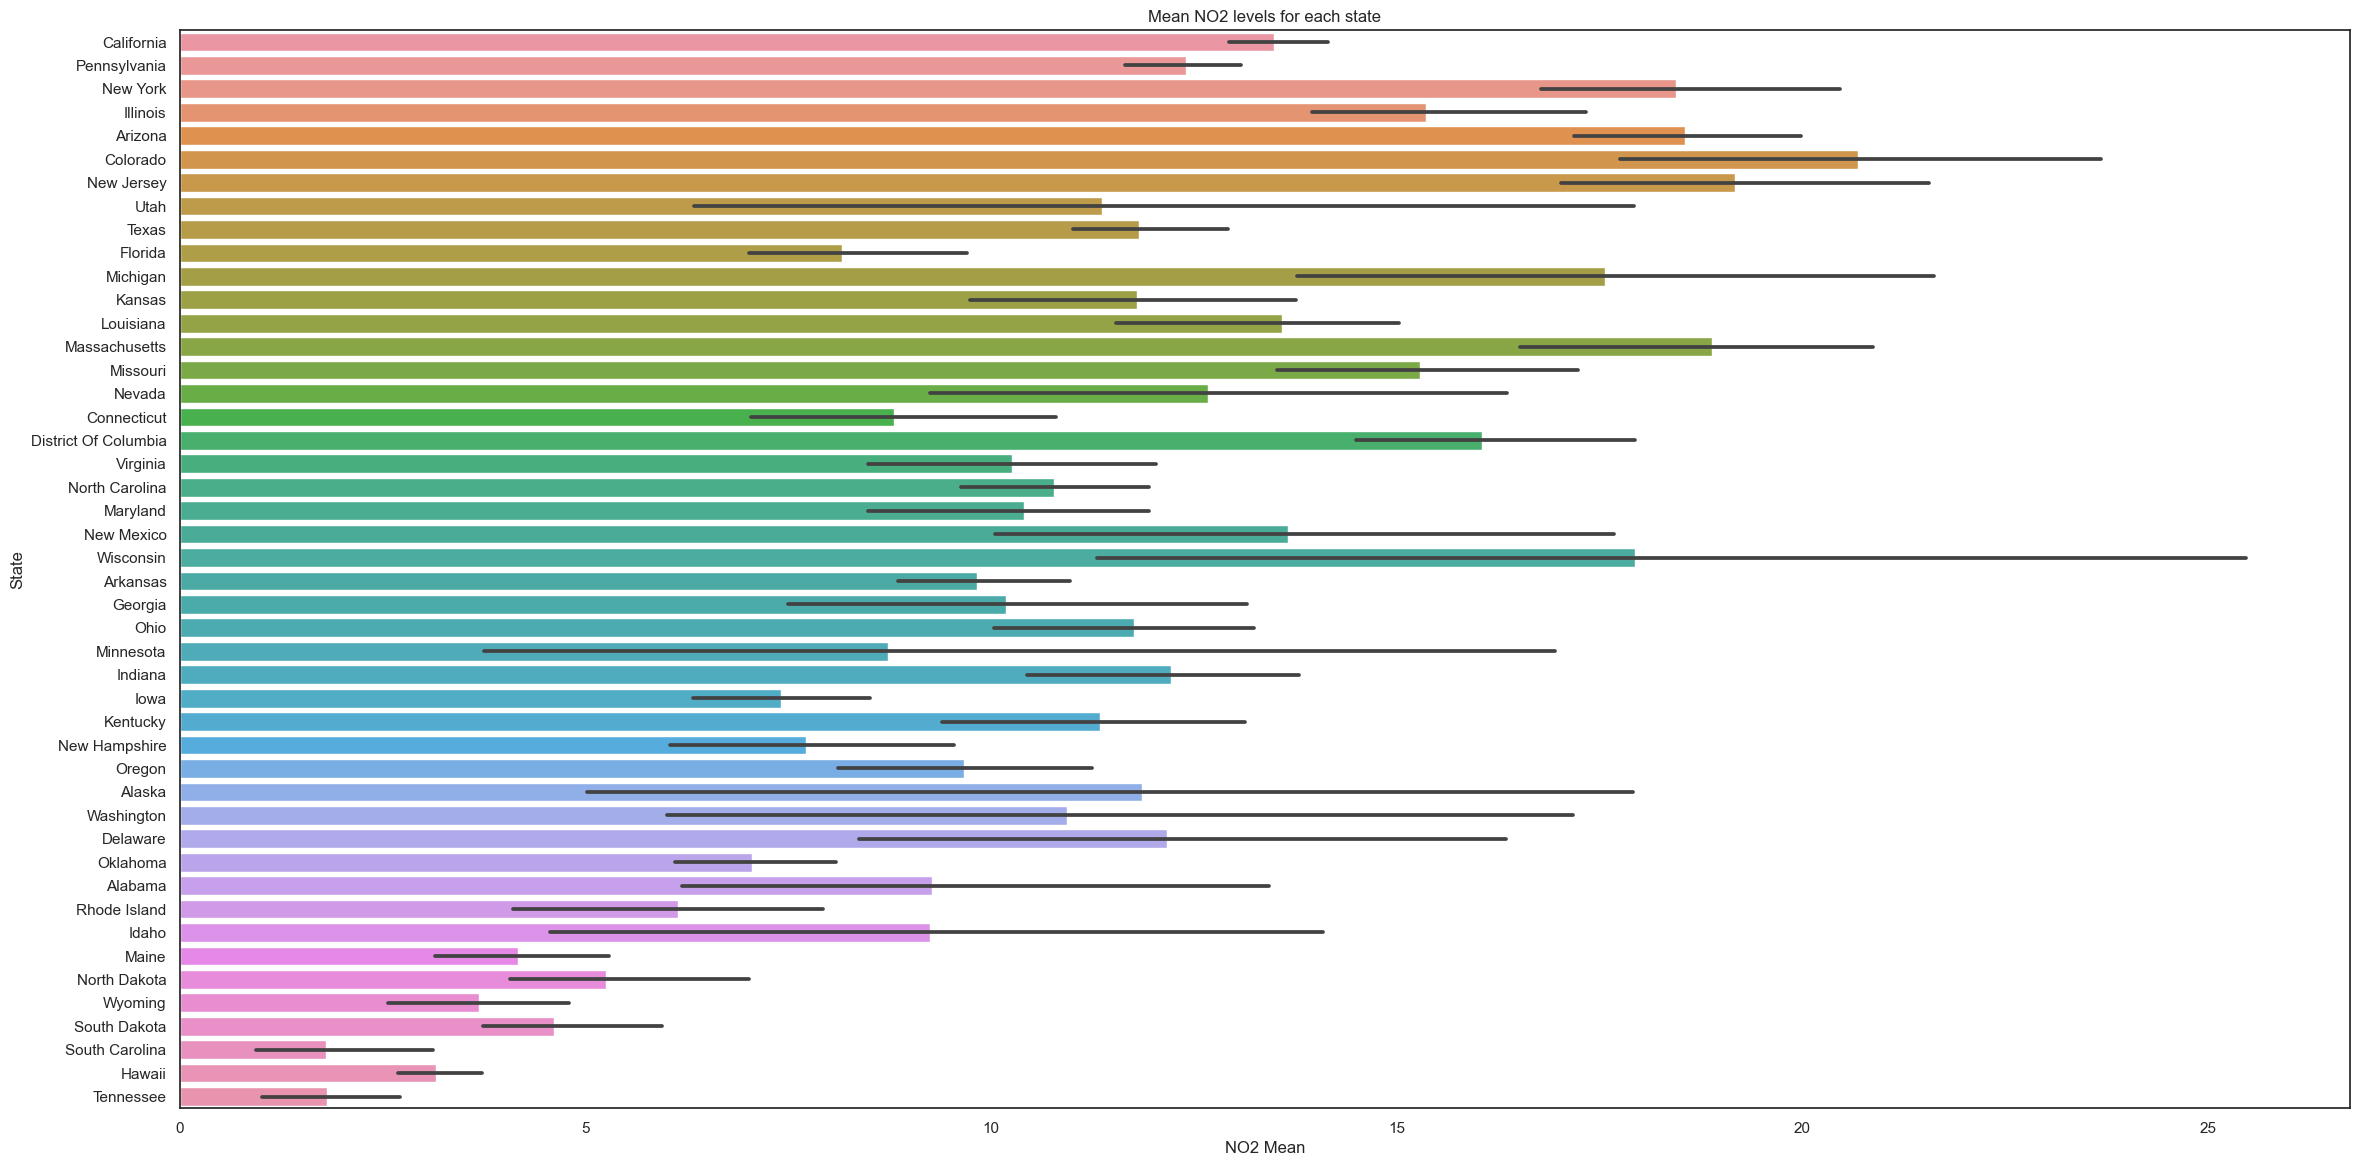

In [21]:
#Mean NO2 levels for each state
# sort the data by 'NO2 Mean' column in descending order
df_NO_sorted = df_NO.sort_values(by='NO2 Mean', ascending=False)

# create a barplot using the sorted data
ax = sns.barplot(x="NO2 Mean", y="State", data=df_NO_sorted, ci=100)

# set the size of the plot
fig = plt.gcf()
fig.set_size_inches(28, 14)

# set the title of the plot
plt.title("Mean NO2 levels for each state")
# Save figure with the parameter bbox_inches to fit the whole image


In [22]:
#O3 data

O3_data_Air = df_air_quality[["State", "County", "City","O3 Mean","O3 1st Max Value", "O3 1st Max Hour", "O3 AQI"
                          ]]
O3_data_Air.head()

,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI
0,Colorado,Adams,Welby,0.029625,0.063,10,61
1,California,Humboldt,Eureka,0.034208,0.039,16,36
2,California,Fresno,Fresno,0.060458,0.083,9,119
3,Pennsylvania,Bucks,Bristol,0.033000,0.042,0,36
4,California,Humboldt,Eureka,0.034100,0.039,10,33


In [23]:
O3_data_Air = df_air_quality[["State", "County", "City","O3 Mean","O3 1st Max Value", "O3 1st Max Hour", "O3 AQI"]]
O3_data_Air = O3_data_Air.sort_values(by='O3 Mean', ascending=False)
O3_data_Air.head()

,State,County,City,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI
2202,Pennsylvania,Blair,Altoona,0.079667,0.095,10,150
8716,California,San Bernardino,Victorville,0.075583,0.113,16,195
2607,Pennsylvania,Erie,Erie,0.072708,0.090,11,137
3585,Pennsylvania,Bucks,Bristol,0.072375,0.119,10,202
9395,California,Santa Barbara,Capitan,0.070850,0.086,11,151


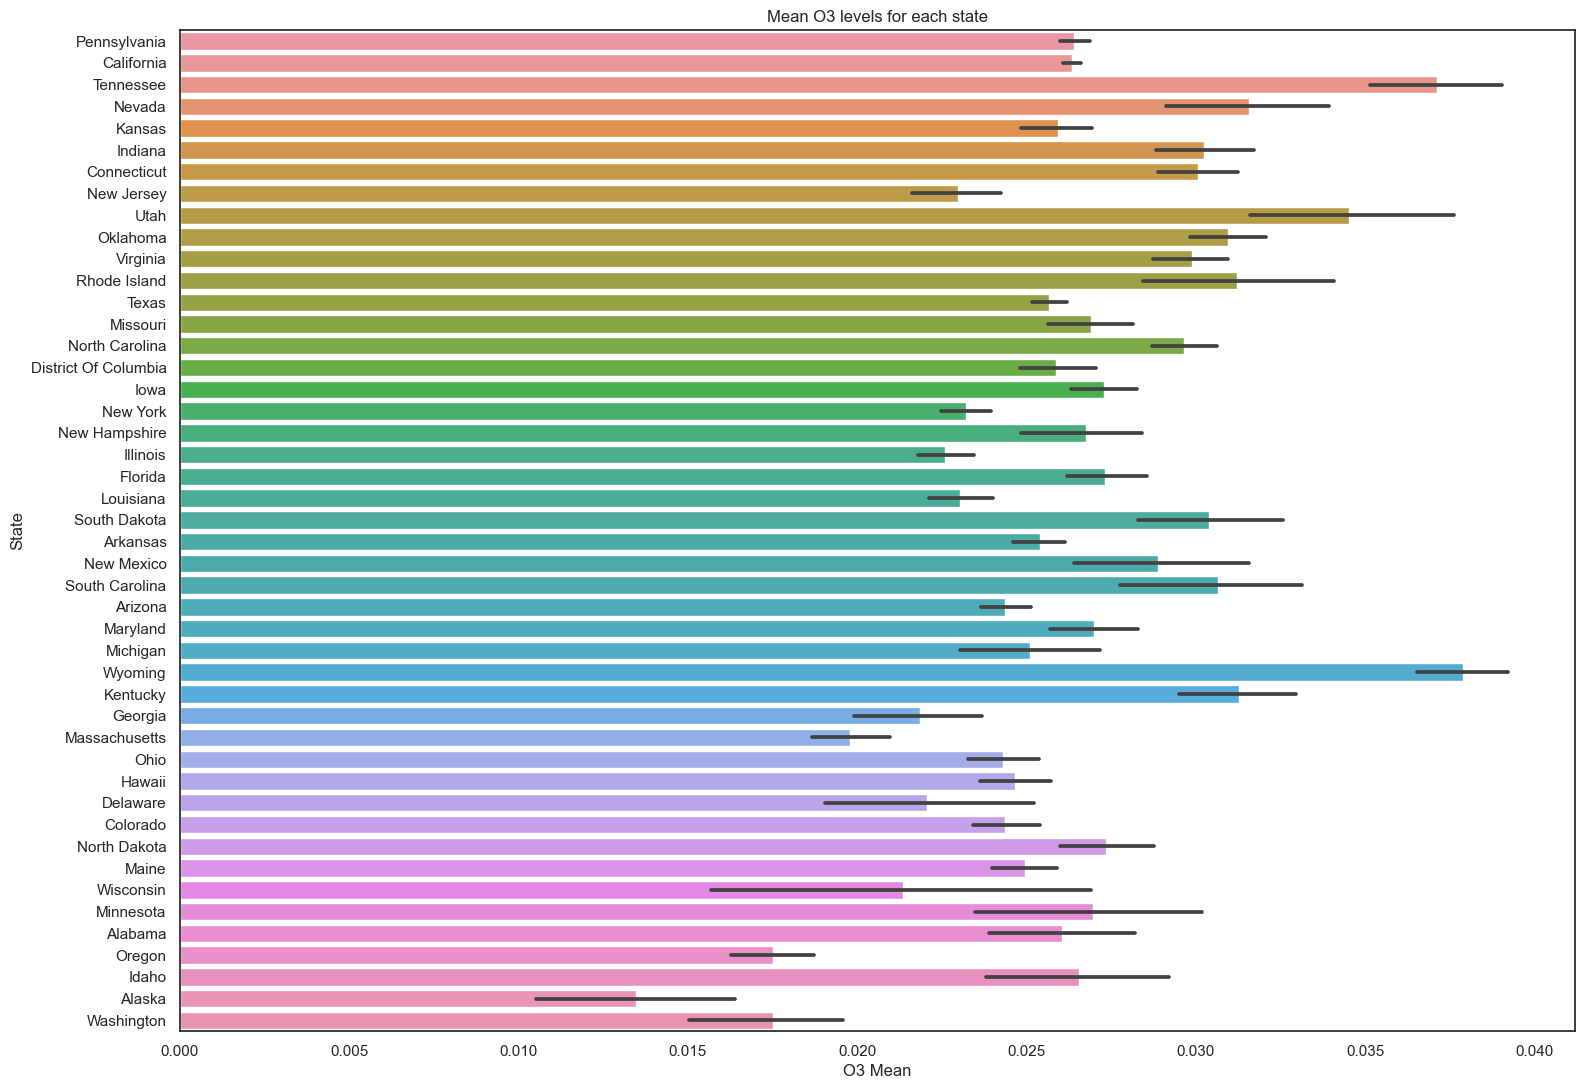

In [25]:
#change
#Mean O3 levels for each state
ax = sns.barplot(x="O3 Mean",y="State", data=O3_data_Air, ci=80)
fig = plt.gcf()
fig.set_size_inches(18, 13)


plt.title("Mean O3 levels for each state")


plt.show()



In [26]:
#SO2 data
SO2_data_Air = df_air_quality[["State","County", "City","SO2 Mean","SO2 1st Max Value", "SO2 1st Max Hour", "SO2 AQI","Date Local","year"
                   ]]
SO2_data_Air.head()

,State,County,City,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,Date Local,year
0,Colorado,Adams,Welby,2.000000,11.0,8,16.0,2007-07-16,2007
1,California,Humboldt,Eureka,-0.079167,0.0,5,0.0,2015-04-21,2015
2,California,Fresno,Fresno,3.457143,4.3,11,NaN,2009-07-19,2009
3,Pennsylvania,Bucks,Bristol,2.541667,6.0,23,9.0,2005-04-27,2005
4,California,Humboldt,Eureka,-0.460000,-0.4,11,NaN,2012-05-13,2012


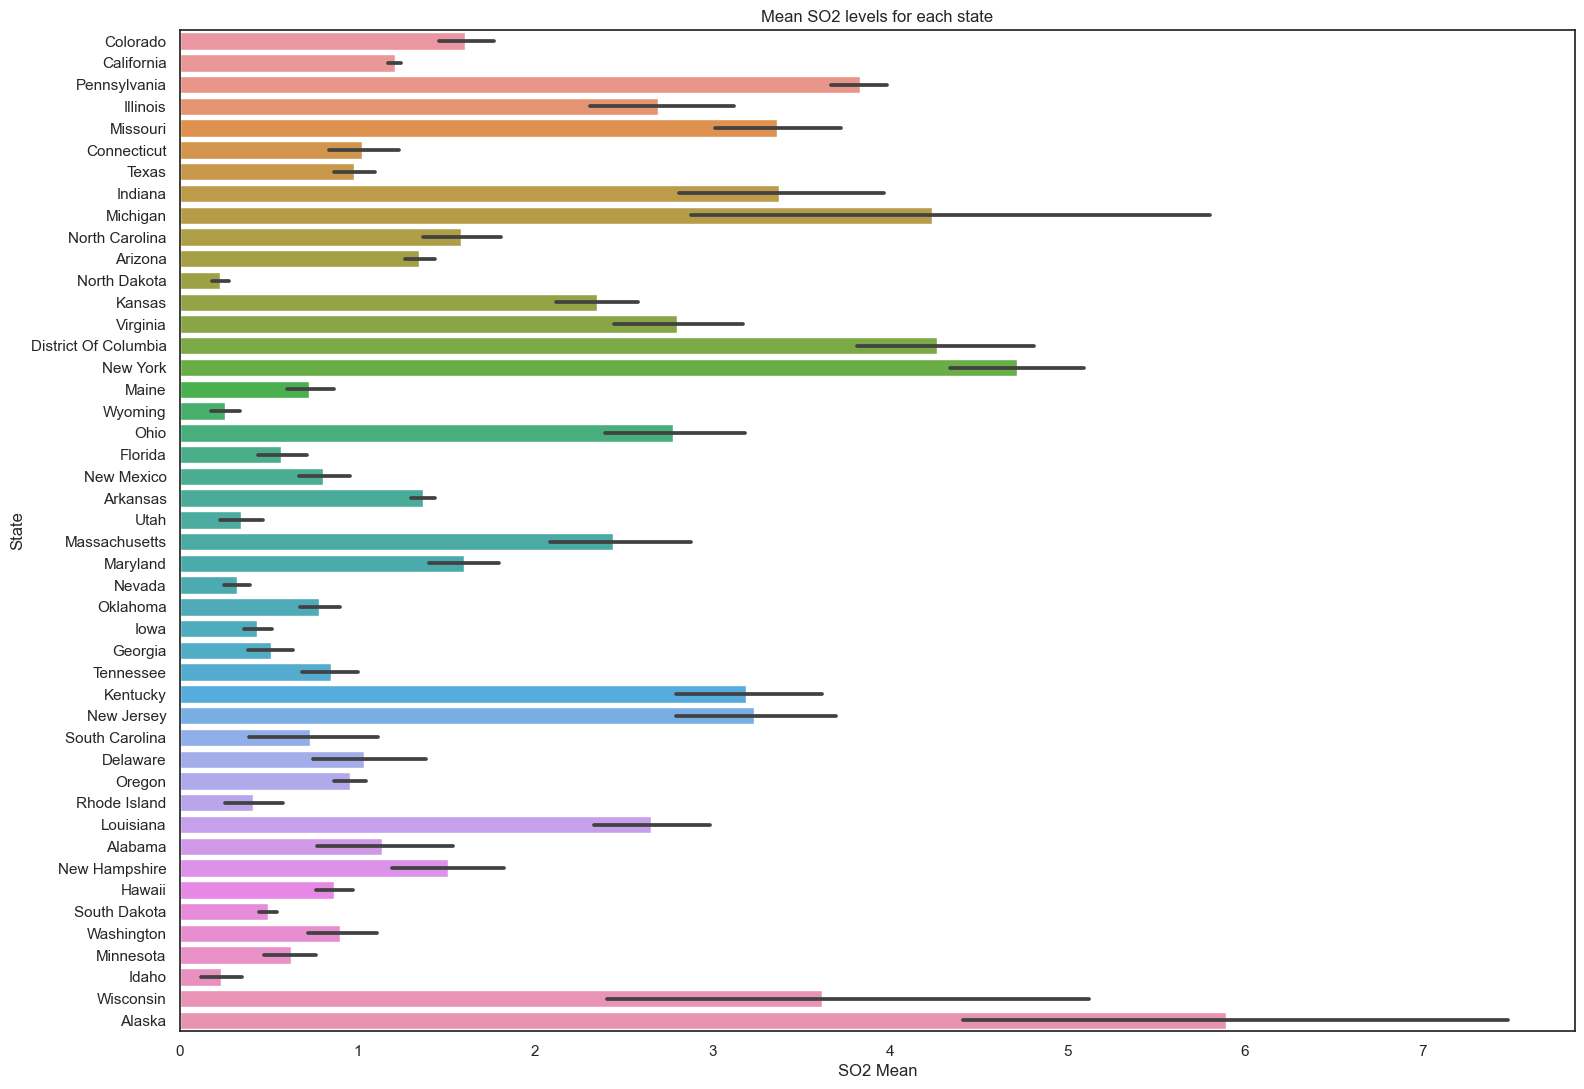

In [27]:
#change
#Mean SO2 levels for each state
ax = sns.barplot(x="SO2 Mean",y="State", data=SO2_data_Air, ci=85)
fig = plt.gcf()
fig.set_size_inches(18, 13)

plt.title("Mean SO2 levels for each state")

#change 
plt.show()

In [28]:
#CO data
CO_data_Air = df_air_quality[["State", "County", "City","CO Mean","CO 1st Max Value", "CO 1st Max Hour", "CO AQI", "Date Local","year"
                  ]]
CO_data_Air.head()

,State,County,City,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,Date Local,year
0,Colorado,Adams,Welby,0.383333,1.1,6,NaN,2007-07-16,2007
1,California,Humboldt,Eureka,0.412500,0.5,7,NaN,2015-04-21,2015
2,California,Fresno,Fresno,0.182609,0.3,5,NaN,2009-07-19,2009
3,Pennsylvania,Bucks,Bristol,0.129167,0.3,18,NaN,2005-04-27,2005
4,California,Humboldt,Eureka,0.400000,0.4,0,5.0,2012-05-13,2012


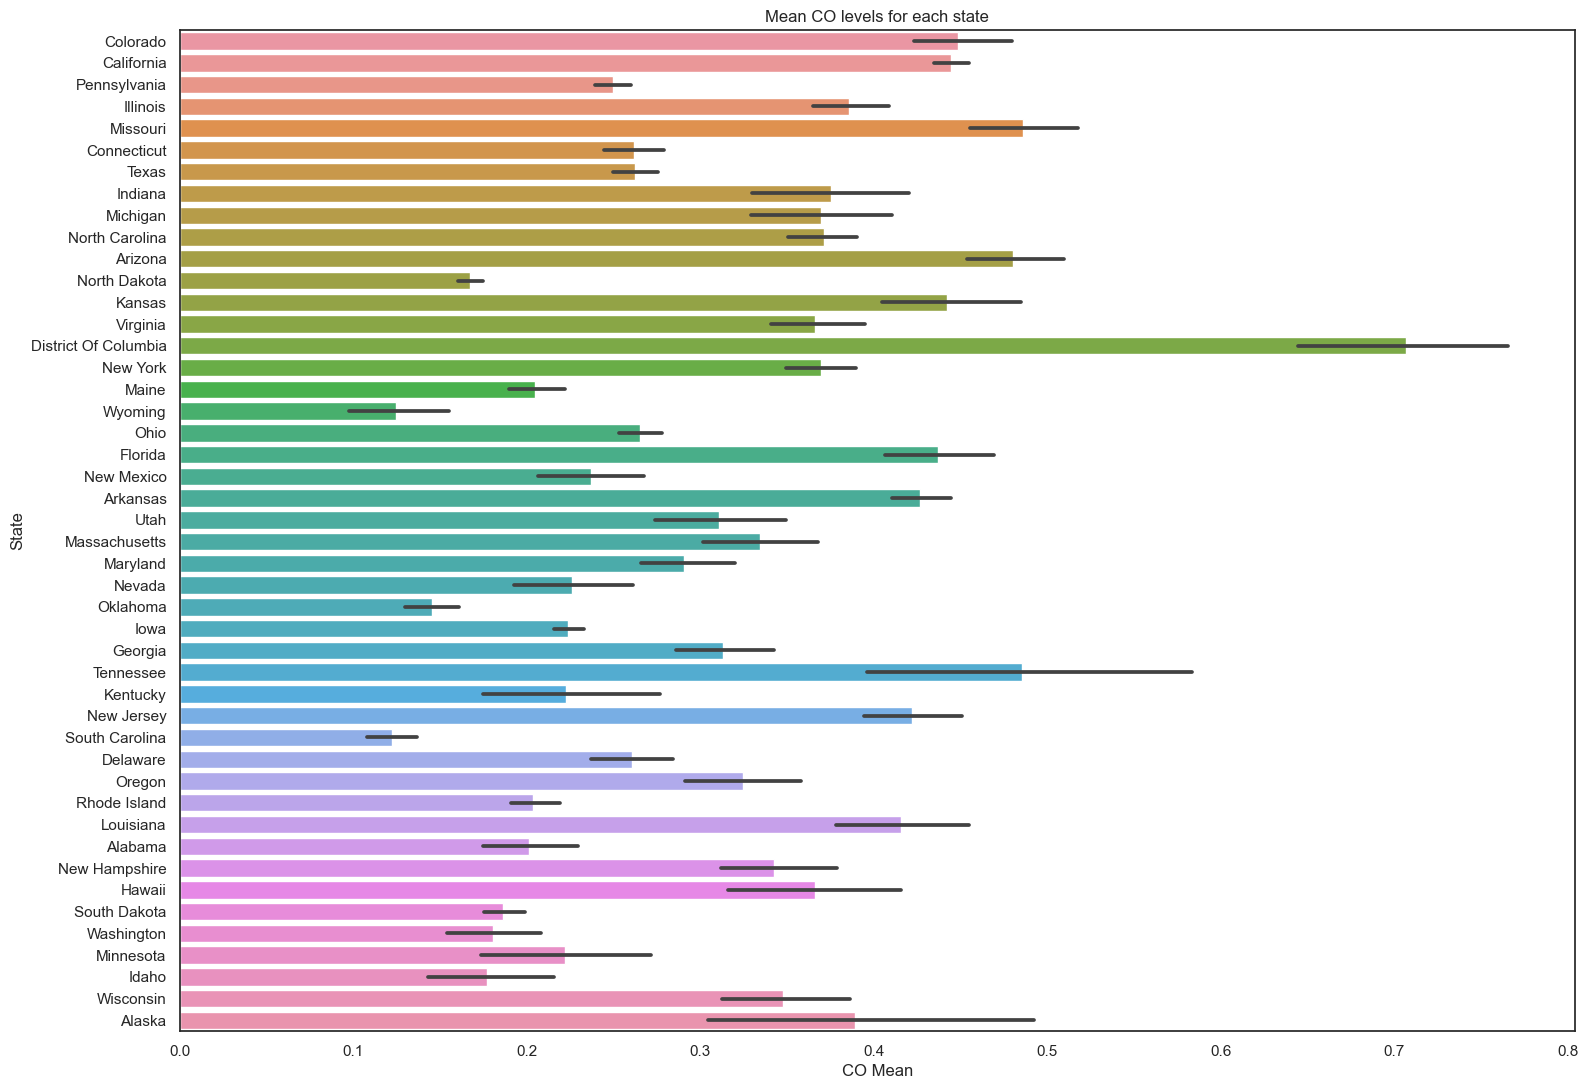

In [29]:
#Mean CO levels for each state
ax = sns.barplot(x="CO Mean",y="State", data=CO_data_Air, ci=88)
fig = plt.gcf()
fig.set_size_inches(18, 13)

plt.title("Mean CO levels for each state")


plt.show()

In [30]:
df_group = df_air_quality.groupby(["State"]).mean()

df_group.head()

,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month
State,,,,,,,,,,,,,,,,,,
Alabama,9.273707,22.315000,8.700000,20.650000,0.026038,0.040000,8.850000,37.000000,1.139562,6.495000,11.650000,13.545455,0.201529,0.323000,4.850000,3.833333,2014.800000,6.750000
Alaska,11.857000,28.510000,13.200000,26.600000,0.013475,0.021300,9.000000,19.600000,5.890292,10.800000,8.300000,15.000000,0.389438,0.567000,15.000000,6.625000,2014.600000,8.100000
Arizona,18.553898,36.795251,13.722955,34.641161,0.024369,0.041675,9.931398,37.617414,1.348859,2.654090,10.501319,4.210811,0.480026,0.937274,8.952507,9.715736,2007.522427,6.638522
Arkansas,9.829061,23.193833,11.096916,21.577093,0.025402,0.037040,10.211454,33.541850,1.370210,2.244934,9.806167,3.116505,0.426792,0.571767,7.189427,6.182540,2011.678414,6.784141
California,13.483638,25.466384,10.969743,23.994554,0.026328,0.039030,10.129803,35.925567,1.211108,2.472526,8.548865,3.756303,0.444744,0.756838,7.275643,7.462339,2007.433283,6.405446


In [31]:
df_air_quality.head()


,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month
0,Colorado,Adams,Welby,2007-07-16,22.652174,43.0,7,41,0.029625,0.063,...,2.000000,11.0,8,16.0,0.383333,1.1,6,NaN,2007,7
1,California,Humboldt,Eureka,2015-04-21,1.237500,2.8,9,2,0.034208,0.039,...,-0.079167,0.0,5,0.0,0.412500,0.5,7,NaN,2015,4
2,California,Fresno,Fresno,2009-07-19,8.956522,18.0,5,17,0.060458,0.083,...,3.457143,4.3,11,NaN,0.182609,0.3,5,NaN,2009,7
3,Pennsylvania,Bucks,Bristol,2005-04-27,16.625000,34.0,18,32,0.033000,0.042,...,2.541667,6.0,23,9.0,0.129167,0.3,18,NaN,2005,4
4,California,Humboldt,Eureka,2012-05-13,1.661111,2.7,13,2,0.034100,0.039,...,-0.460000,-0.4,11,NaN,0.400000,0.4,0,5.0,2012,5


In [41]:
#drop unwanted columns
data_delete = df_air_quality.drop(['County','City',
                'NO2 1st Max Value','NO2 1st Max Hour',
                'O3 1st Max Value',
                'SO2 1st Max Value','SO2 1st Max Hour',
                'CO 1st Max Value','CO 1st Max Hour','year'], axis=1)
data_delete.head()

,State,Date Local,NO2 Mean,NO2 AQI,O3 Mean,O3 1st Max Hour,O3 AQI,SO2 Mean,SO2 AQI,CO Mean,CO AQI,month
0,Colorado,2007-07-16,22.652174,41,0.029625,10,61,2.000000,16.0,0.383333,NaN,7
1,California,2015-04-21,1.237500,2,0.034208,16,36,-0.079167,0.0,0.412500,NaN,4
2,California,2009-07-19,8.956522,17,0.060458,9,119,3.457143,NaN,0.182609,NaN,7
3,Pennsylvania,2005-04-27,16.625000,32,0.033000,0,36,2.541667,9.0,0.129167,NaN,4
4,California,2012-05-13,1.661111,2,0.034100,10,33,-0.460000,NaN,0.400000,5.0,5


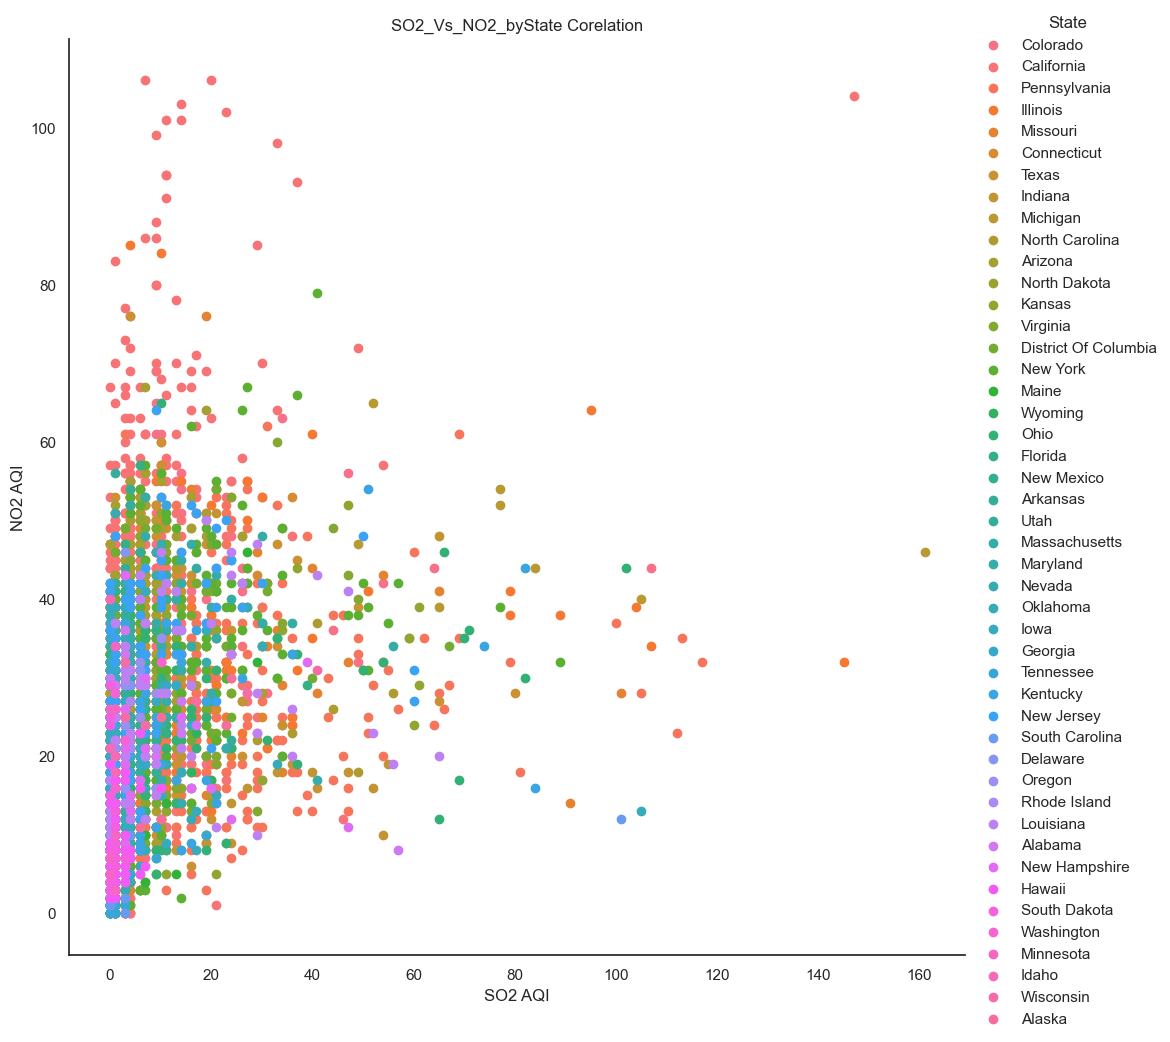

In [43]:
#To create a seaborn plot using NO2 Mean and SO2 Mean Data
#Checking the corealation between these two gases
sns.FacetGrid(data_delete, hue="State", height=10) \
   .map(plt.scatter, "SO2 AQI", "NO2 AQI") \
   .add_legend()

plt.title("SO2_Vs_NO2_byState Corelation")


plt.show()

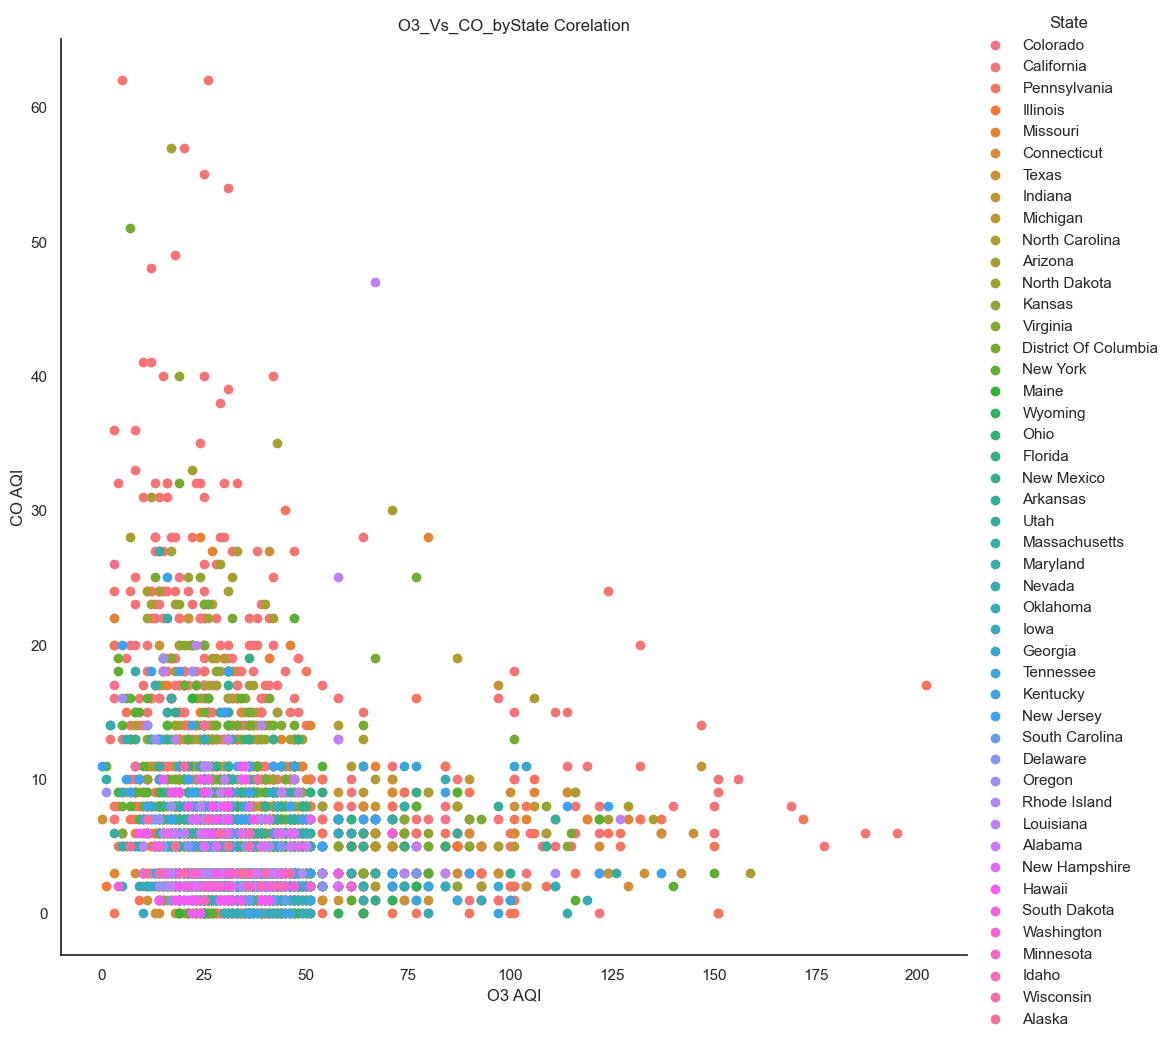

In [44]:
#To create a seaborn plot using O3 Mean and CO Mean Data
#Checking the corealation between these two gases

sns.FacetGrid(data_delete, hue="State", height=10) \
   .map(plt.scatter, "O3 AQI", "CO AQI") \
   .add_legend()

plt.title("O3_Vs_CO_byState Corelation")


plt.show()

In [45]:
air_correlation = df_air_quality[['NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]

air_correlation.head()


,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,41,61,16.0,NaN
1,2,36,0.0,NaN
2,17,119,NaN,NaN
3,32,36,9.0,NaN
4,2,33,NaN,5.0


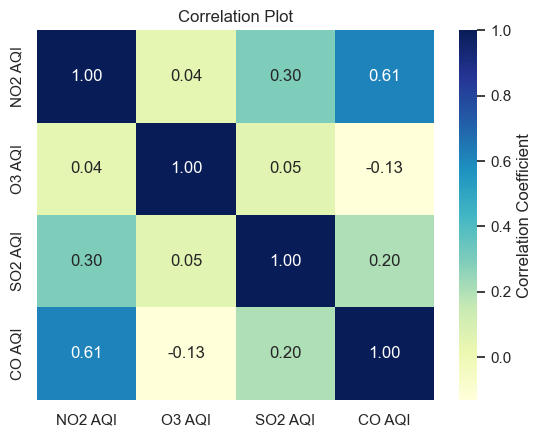

In [46]:


sns.heatmap(air_correlation.corr(), annot= True ,  fmt = ".2f"  , cmap = "YlGnBu", cbar_kws= {'label' : 'Correlation Coefficient'})

plt.title("Correlation Plot")
plt.show()

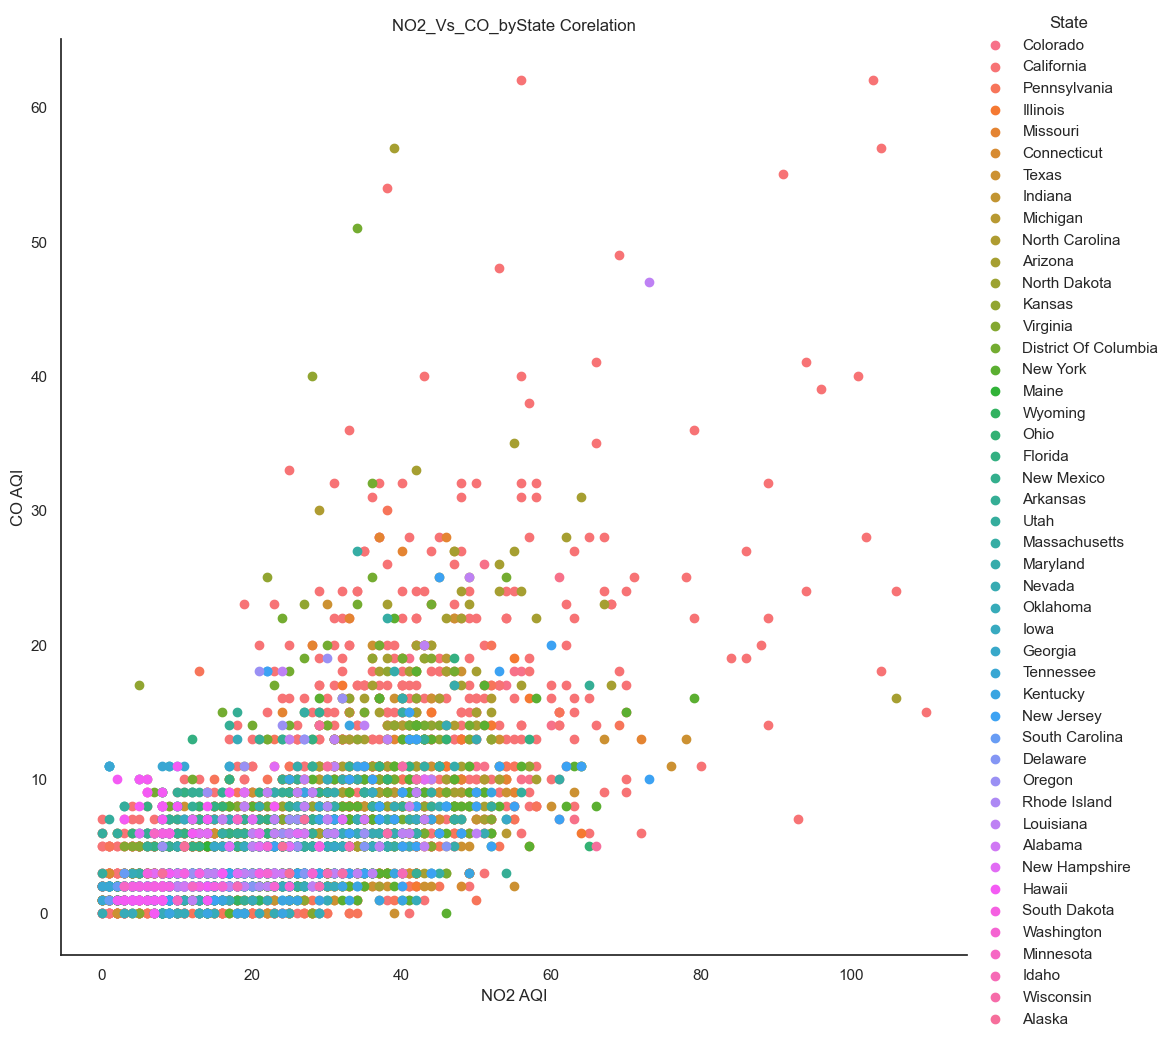

In [47]:
#To create a seaborn plot using NO2 Mean and CO Mean Data
# As we know now that CO and NO2 has. astrong corelation we plot this to visualize it 

sns.FacetGrid(data_delete, hue="State", height=10) \
   .map(plt.scatter, "NO2 AQI", "CO AQI") \
   .add_legend()

plt.title("NO2_Vs_CO_byState Corelation")


plt.show()

In [49]:
df_air_quality.City.unique()


array(['Welby', 'Eureka', 'Fresno', 'Bristol', 'East Saint Louis',
       'St. Louis', 'San Jose', 'Westport', 'Lompoc', 'Johnstown',
       'Not in a city', 'Concord', 'Northbrook', 'Burbank', 'Houston',
       'Indianapolis (Remainder)', 'Bethel Island', 'Detroit',
       'Charlotte', 'Phoenix', 'Rubidoux', 'Kansas City', 'Annandale',
       'Alexandria', 'Capitan', 'Washington', 'Long Beach', 'Los Angeles',
       'Victorville', 'Costa Mesa', 'New York', 'Presque Isle',
       'Pittsburgh', 'Chula Vista', 'Norristown', 'Freemansburg',
       'Altoona', 'Cornwall', 'Holtsville', 'Davenport', 'Austin',
       'Cleveland', 'Winter Park', 'Arden-Arcade', 'Cupertino',
       'Scranton', 'Albuquerque', 'Vandenberg Air Force Base', 'York',
       'North Little Rock', 'San Pablo', 'Goleta', 'Vallejo', 'Dallas',
       'Denver', 'Boston', 'Crockett', 'Ferguson', 'Beltsville', 'Reno',
       'New Castle', 'San Diego', 'Deer Park', 'El Paso', 'Ponca City',
       'New Haven', 'Park Hill',
    

In [71]:
df_air_quality.City.count()


10000

In [52]:
air_data= ['NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]
cu_air = df_air_quality[['State','year','NO2 AQI','O3 AQI','SO2 AQI',"CO AQI"]]

custom_df.head()

,State,year,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Colorado,2007,41,61,16.0,NaN
1,California,2015,2,36,0.0,NaN
2,California,2009,17,119,NaN,NaN
3,Pennsylvania,2005,32,36,9.0,NaN
4,California,2012,2,33,NaN,5.0


In [53]:
for col in air_data:
    cu_air[col] =(cu_air[col] - cu_air[col].mean())/cu_air[col].std(ddof=0)
    
#.stack()
cu_air = cu_air.melt(["State", "year"])
cu_air.head()

,State,year,variable,value
0,Colorado,2007,NO2 AQI,1.130694
1,California,2015,NO2 AQI,-1.452735
2,California,2009,NO2 AQI,-0.459109
3,Pennsylvania,2005,NO2 AQI,0.534518
4,California,2012,NO2 AQI,-1.452735


In [55]:
len(df_air_quality.State.unique())


47

In [56]:
## Prepare all 4 AQIs against state and date 

df_State = df_air_quality[['State','Date Local','NO2 AQI','O3 AQI','SO2 AQI','CO AQI']]

df_State.head()

,State,Date Local,NO2 AQI,O3 AQI,SO2 AQI,CO AQI
0,Colorado,2007-07-16,41,61,16.0,NaN
1,California,2015-04-21,2,36,0.0,NaN
2,California,2009-07-19,17,119,NaN,NaN
3,Pennsylvania,2005-04-27,32,36,9.0,NaN
4,California,2012-05-13,2,33,NaN,5.0


In [58]:
df_air_quality

,State,County,City,Date Local,NO2 Mean,NO2 1st Max Value,NO2 1st Max Hour,NO2 AQI,O3 Mean,O3 1st Max Value,...,SO2 Mean,SO2 1st Max Value,SO2 1st Max Hour,SO2 AQI,CO Mean,CO 1st Max Value,CO 1st Max Hour,CO AQI,year,month
0,Colorado,Adams,Welby,2007-07-16,22.652174,43.0,7,41,0.029625,0.063,...,2.000000,11.0,8,16.0,0.383333,1.100,6,NaN,2007,7
1,California,Humboldt,Eureka,2015-04-21,1.237500,2.8,9,2,0.034208,0.039,...,-0.079167,0.0,5,0.0,0.412500,0.500,7,NaN,2015,4
2,California,Fresno,Fresno,2009-07-19,8.956522,18.0,5,17,0.060458,0.083,...,3.457143,4.3,11,NaN,0.182609,0.300,5,NaN,2009,7
3,Pennsylvania,Bucks,Bristol,2005-04-27,16.625000,34.0,18,32,0.033000,0.042,...,2.541667,6.0,23,9.0,0.129167,0.300,18,NaN,2005,4
4,California,Humboldt,Eureka,2012-05-13,1.661111,2.7,13,2,0.034100,0.039,...,-0.460000,-0.4,11,NaN,0.400000,0.400,0,5.0,2012,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,Iowa,Scott,Davenport,2014-10-18,6.319048,16.4,22,15,0.007917,0.017,...,0.221739,0.4,22,0.0,0.225091,0.528,21,NaN,2014,10
9996,Connecticut,Hartford,East Hartford,2015-06-29,5.395652,22.2,22,21,0.016292,0.028,...,0.131818,0.3,21,0.0,0.171957,0.292,22,NaN,2015,6
9997,Maryland,Prince George's,Beltsville,2012-12-27,5.400000,7.9,0,7,0.028083,0.033,...,0.675000,3.2,7,4.0,0.194167,0.232,8,NaN,2012,12
9998,California,Alameda,Oakland,2002-09-05,14.782609,29.0,6,27,0.020542,0.033,...,2.086957,3.0,1,4.0,0.325000,0.600,10,7.0,2002,9


In [61]:
df_air_quality['NO2 Mean'] = df_air_quality['NO2 Mean'].fillna(df_air_quality['NO2 Mean'].mean())
df_air_quality['O3 Mean'] = df_air_quality['O3 Mean'].fillna(df_air_quality['O3 Mean'].mean())
df_air_quality['SO2 Mean'] = df_air_quality['SO2 Mean'].fillna(df_air_quality['SO2 Mean'].mean())
df_air_quality['CO Mean'] = df_air_quality['CO Mean'].fillna(df_air_quality['CO Mean'].mean())


In [62]:
df_air_quality['NO2 AQI'] = df_air_quality['NO2 AQI'].fillna(df_air_quality['NO2 AQI'].mean())
df_air_quality['O3 AQI'] = df_air_quality['O3 AQI'].fillna(df_air_quality['O3 AQI'].mean())
df_air_quality['CO AQI'] = df_air_quality['CO AQI'].fillna(df_air_quality['CO AQI'].mean())
df_air_quality['SO2 AQI'] = df_air_quality['SO2 AQI'].fillna(df_air_quality['SO2 AQI'].mean())


In [63]:
df_air_quality['AQI_mean'] = df_air_quality[['NO2 AQI', 'O3 AQI', 'CO AQI', 'SO2 AQI']].fillna(df_air_quality.mean()).mean(axis=1)


In [64]:
from sklearn.model_selection import train_test_split

X = df_air_quality[['NO2 Mean', 'O3 Mean', 'SO2 Mean', 'CO Mean']]
y = df_air_quality['AQI_mean']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [65]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

In [ ]:
#linear regression

In [66]:
# Linear Regression
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

regressor_lr = LinearRegression()
regressor_lr.fit(X_train, y_train)

y_pred_lr_train = regressor_lr.predict(X_train)
print('Linear Regression - Train')
print('R^2 score:', r2_score(y_train, y_pred_lr_train))
print('Mean Squared Error:', mean_squared_error(y_train, y_pred_lr_train))
print('Mean Absolute Error:', mean_absolute_error(y_train, y_pred_lr_train))

y_pred_lr_test = regressor_lr.predict(X_test)
print('Linear Regression - Test')
print('R^2 score:', r2_score(y_test, y_pred_lr_test))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_lr_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_lr_test))

Linear Regression - Train
R^2 score: 0.7008280656923324
Mean Squared Error: 16.109226537202716
Mean Absolute Error: 2.8398741549530913
Linear Regression - Test
R^2 score: 0.6900623288715637
Mean Squared Error: 18.223983490583645
Mean Absolute Error: 2.9355744464528537


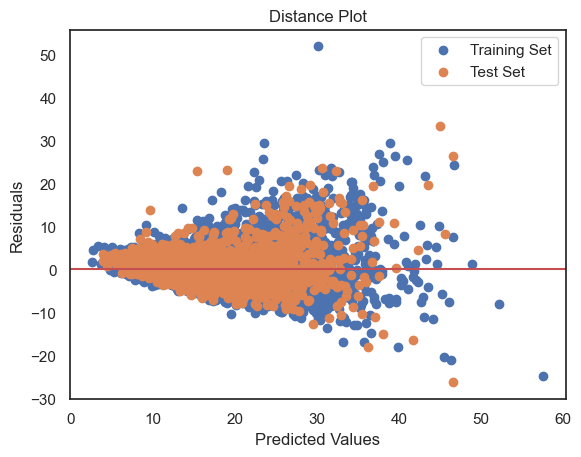

In [67]:
residuals_train = y_train - y_pred_lr_train
residuals_test = y_test - y_pred_lr_test

# Plot the distance plot
plt.scatter(y_pred_lr_train, residuals_train, label='Training Set')
plt.scatter(y_pred_lr_test, residuals_test, label='Test Set')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Distance Plot')
plt.legend()
plt.show()

In [ ]:
# k Neighbors Regression

In [68]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# fit the KNN regressor on the training set
regressor_knn = KNeighborsRegressor(n_neighbors=5)
regressor_knn.fit(X_train, y_train)

# predict the target variable on the training and test sets
y_pred_train = regressor_knn.predict(X_train)
y_pred_test = regressor_knn.predict(X_test)

# calculate the R^2 values on the training and test sets
r2_train = r2_score(y_train, y_pred_train)
r2_test = r2_score(y_test, y_pred_test)

# print the R^2 values on the training and test sets, mean squared error, and mean absolute error
print('K-Nearest Neighbors')
print('R^2 score on train:', r2_train)
print('R^2 score on test:', r2_test)
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_test))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_test))

K-Nearest Neighbors
R^2 score on train: 0.8135447915691023
R^2 score on test: 0.6926604090622777
Mean Squared Error: 18.07121932245139
Mean Absolute Error: 2.755469073481126


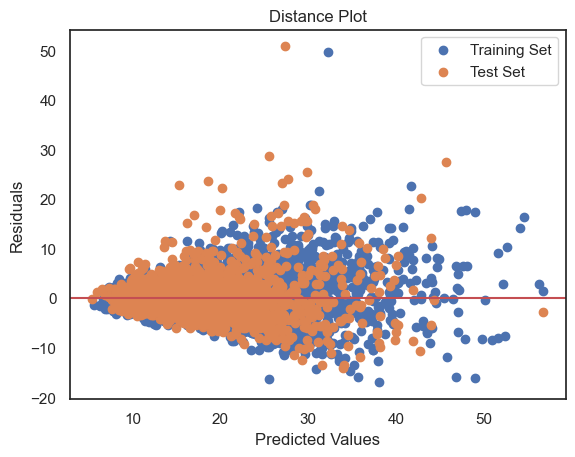

In [69]:
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# Plot the distance plot
plt.scatter(y_pred_train, residuals_train, label='Training Set')
plt.scatter(y_pred_test, residuals_test, label='Test Set')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Distance Plot')
plt.legend()
plt.show()

In [ ]:
# Decision Tree Regressor

In [121]:

from sklearn.tree import DecisionTreeRegressor

# Decision Trees
regressor_dt = DecisionTreeRegressor(random_state=42)
regressor_dt.fit(X_train, y_train)
y_pred_dt = regressor_dt.predict(X_test)
print('\nDecision Trees')
print('R^2 score:', r2_score(y_test, y_pred_dt))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred_dt))
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred_dt))


Decision Trees
R^2 score: 0.534327387259179
Mean Squared Error: 25.505890501306666
Mean Absolute Error: 3.481323574810396


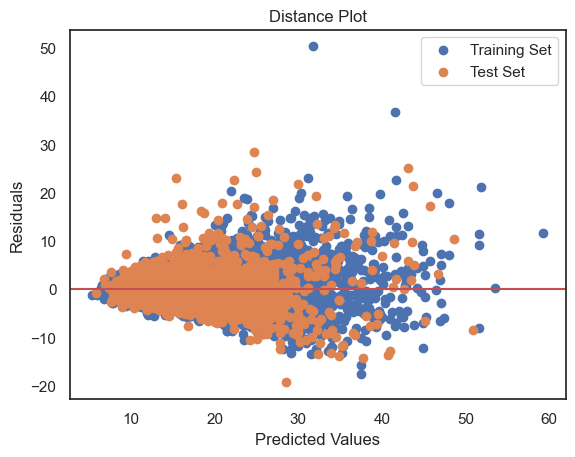

In [122]:
# calculate the residuals
residuals_train = y_train - y_pred_train
residuals_test = y_test - y_pred_test

# plot the distance plot
plt.scatter(y_pred_train, residuals_train, label='Training Set')
plt.scatter(y_pred_test, residuals_test, label='Test Set')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Distance Plot')
plt.legend()
plt.show()

In [ ]:
#Random Forest Regressor

In [123]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# Train a Random Forest model
regressor_rf = RandomForestRegressor(n_estimators=10, random_state=42)
regressor_rf.fit(X_train, y_train)

# Get predicted values on the train and test sets
y_pred_train_rf = regressor_rf.predict(X_train)
y_pred_test_rf = regressor_rf.predict(X_test)

# Evaluate the Random Forest model performance on both sets
print('\nRandom Forest')
print('R^2 score on train set:', r2_score(y_train, y_pred_train_rf))
print('R^2 score on test set:', r2_score(y_test, y_pred_test_rf))
print('Mean Squared Error on test set:', mean_squared_error(y_test, y_pred_test_rf))
print('Mean Absolute Error on test set:', mean_absolute_error(y_test, y_pred_test_rf))


Random Forest
R^2 score on train set: 0.9557637498142305
R^2 score on test set: 0.7229482434937637
Mean Squared Error on test set: 15.174720546805508
Mean Absolute Error on test set: 2.654200139365366


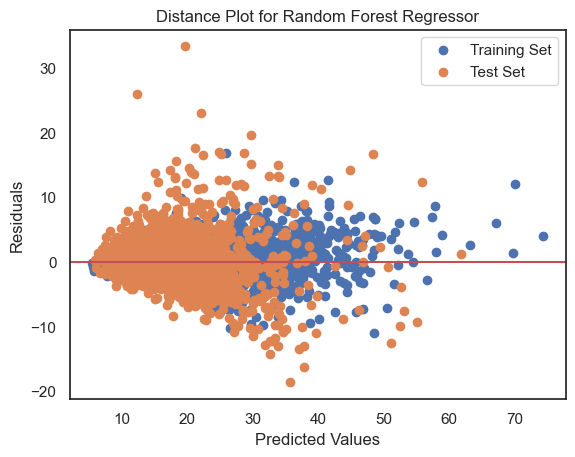

In [124]:

# Calculate residuals for the train and test sets
residuals_train_rf = y_train - y_pred_train_rf
residuals_test_rf = y_test - y_pred_test_rf

# Create a distance plot
plt.scatter(y_pred_train_rf, residuals_train_rf, label='Training Set')
plt.scatter(y_pred_test_rf, residuals_test_rf, label='Test Set')
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Distance Plot for Random Forest Regressor')
plt.legend()
plt.show()

In [ ]:
#gradient Boosting regressor

In [74]:
#looking at the code below write a code for distance plot, 
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

# define and fit the Gradient Boosting Regressor
regressor_gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
regressor_gb.fit(X_train, y_train)

# predict on test data and calculate evaluation metrics
y_pred_gb = regressor_gb.predict(X_test)
test_r2_gb = r2_score(y_test, y_pred_gb)
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)

print('\nGradient Boosting')
print('Test R^2 score:', test_r2_gb)
print('Mean Squared Error:', mse_gb)
print('Mean Absolute Error:', mae_gb)

# predict on training data and calculate R-squared
train_pred_gb = regressor_gb.predict(X_train)
train_r2_gb = r2_score(y_train, train_pred_gb)

print('\nGradient Boosting')
print('Train R^2 score:', train_r2_gb)


Gradient Boosting
Test R^2 score: 0.7489697159897976
Mean Squared Error: 14.760295948480223
Mean Absolute Error: 2.540112356971744

Gradient Boosting
Train R^2 score: 0.8156847208159191


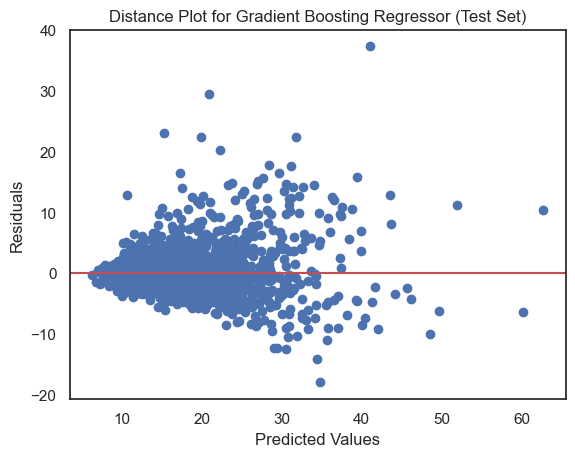

In [73]:
residuals_test_gb = y_test - y_pred_gb

# Create a distance plot for Gradient Boosting Regressor
plt.scatter(y_pred_gb, residuals_test_gb)
plt.axhline(y=0, color='r', linestyle='-')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Distance Plot for Gradient Boosting Regressor (Test Set)')
plt.show()

In [128]:
#Plot the feature importances of the Random Forest model
importances = regressor_rf.feature_importances_
indices = np.argsort(importances)[::-1]


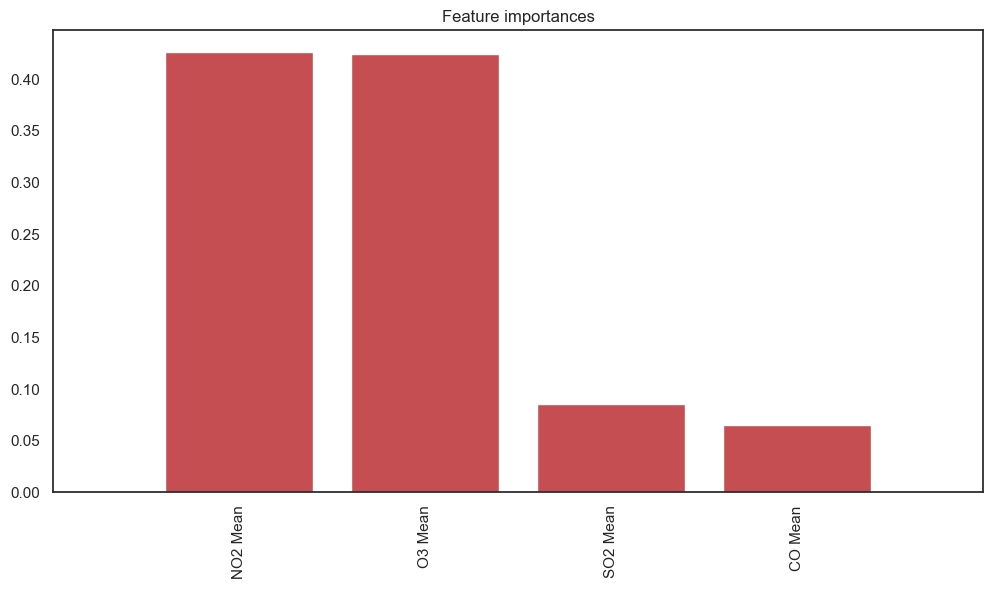

In [129]:
plt.figure(figsize=(12,6))
plt.title("Feature importances")
plt.bar(range(X.shape[1]), importances[indices],
color="r", align="center")
plt.xticks(range(X.shape[1]), X.columns[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.show()